# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [26]:
# you are free to use any package you deem fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

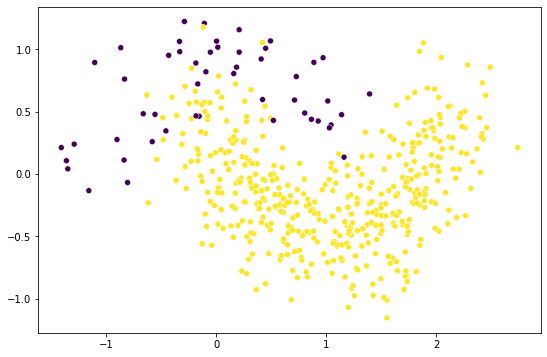

In [5]:
# visualize the dataset
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.scatterplot(x=X[:,0], y=X[:,1], c=Y)
plt.show()

## Training

In [8]:
# create train test split (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=.3)

In [19]:
# K-Means
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
# Naive Bayes
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [24]:
# SVM with polynomial kernel
SVM = SVC(kernel="poly")
SVM.fit(x_train, y_train)

SVC(kernel='poly')

## Testing / Optimization

In [20]:
# testing KNN
yKNNPred = knn.predict(x_test)
ModelMetrics(y_test, yKNNPred)

Accuracy: 96.67%
Sensitivity: 99.26%
Specificity: 73.33%


In [22]:
# testing Naive Bayes
yNBPred = NB.predict(x_test)
ModelMetrics(y_test, yNBPred)

Accuracy: 94.67%
Sensitivity: 97.04%
Specificity: 73.33%


In [25]:
# testing the SVM
ySVMPred = SVM.predict(x_test)
ModelMetrics(y_test, ySVMPred)

Accuracy: 93.33%
Sensitivity: 98.52%
Specificity: 46.67%


Given these results, I'm going to try to optimize the KNN algorithm using grid search. 

In [34]:
# instantiate the grid search object and parameters
model = KNeighborsClassifier()
parameters = {"n_neighbors": list(range(1,10)),
              "weights": ['uniform', 'distance'],
              'algorithm': ["ball_tree", 'kd_tree', 'brute'],
              "leaf_size": list(range(1,60)),
              "p": [1, 2]}
search = GridSearchCV(model, parameters)
search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [35]:
search.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=3,
                     weights='distance')

In [36]:
# train the optimial algorithm
optKNN = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=3, weights='distance')
optKNN.fit(x_train, y_train)

# see how good the model is
yPreds = optKNN.predict(x_test)
ModelMetrics(y_test, yPreds)

Accuracy: 95.33%
Sensitivity: 99.26%
Specificity: 60.00%


## Performance Analysis

In [13]:
# accuracy function
# specificty function
# sensitivity function
def ModelMetrics(yTrue, yPred):
  confusion = confusion_matrix(yTrue, yPred)
  TP = confusion[1,1] # true positive
  TN = confusion[0,0] # true negative
  FP = confusion[0,1] # false positive
  FN = confusion[1,0] # false negative
  acc = (TP+TN)/(TP+FP+FN+TN)
  sens = TP/(TP+FN)
  spec = TN/(TN+FP)
  print(f"Accuracy: {(acc*100):.2f}%\nSensitivity: {(sens*100):.2f}%\nSpecificity: {(spec*100):.2f}%")

# Conclusion
I've determined that the KNN prediction model is a very good classifier between the two datasets. Additionally grid searching parameters to yield the model ultimately decreases accuracy, sensitivity, and specificity. Therefore, the default parameters may be used for a production model. Future iterations of development may choose to use cross fold validation as a more robust way to collect information about model performance.